# Data Science - Supervised Classification Learning Algorithms Analysis

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import validation_curve
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

df = pd.read_csv(r'C:\PAULDATA\Data Analyst Course with Alex Freberg\hr_comma_sep.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
df.shape

(14999, 10)

In [3]:
# Check the number of rows/entries for each value of Target
# This sample dataset has a good balanced Target values
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [4]:
# Apply Label Encoder for all String/Object Column
le = LabelEncoder()
objcols = df.select_dtypes(object).columns
for col in objcols:
    df[col] = le.fit_transform(df[col])

In [5]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,5.870525,1.347290
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.868786,0.625819
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [7]:
# What Features that influence the output of Target column
df.groupby('left').mean('satisfaction_level')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


In [8]:
# Check how 'salary' influence the value of Target column
df[df['left'] == 1].salary.value_counts()

salary
1    2172
2    1317
0      82
Name: count, dtype: int64

In [9]:
# df2 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df2 = df[['time_spend_company','average_montly_hours','promotion_last_5years','salary']]
df2.head(5)

,time_spend_company,average_montly_hours,promotion_last_5years,salary
0,3,157,0,1
1,6,262,0,2
2,4,272,0,2
3,5,223,0,1
4,3,159,0,1


<Axes: xlabel='average_montly_hours', ylabel='promotion_last_5years'>

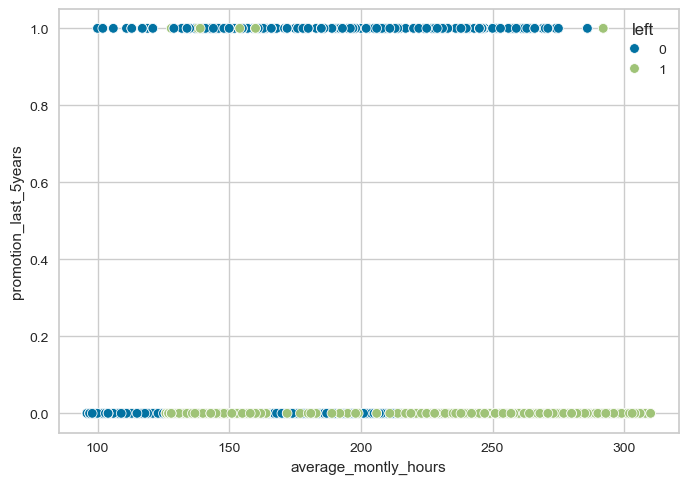

In [10]:
# Draw the Scatter Plot of time_spend_company and average_montly_hours cols.
sns.scatterplot(x='average_montly_hours', y='promotion_last_5years', data=df, hue='left')

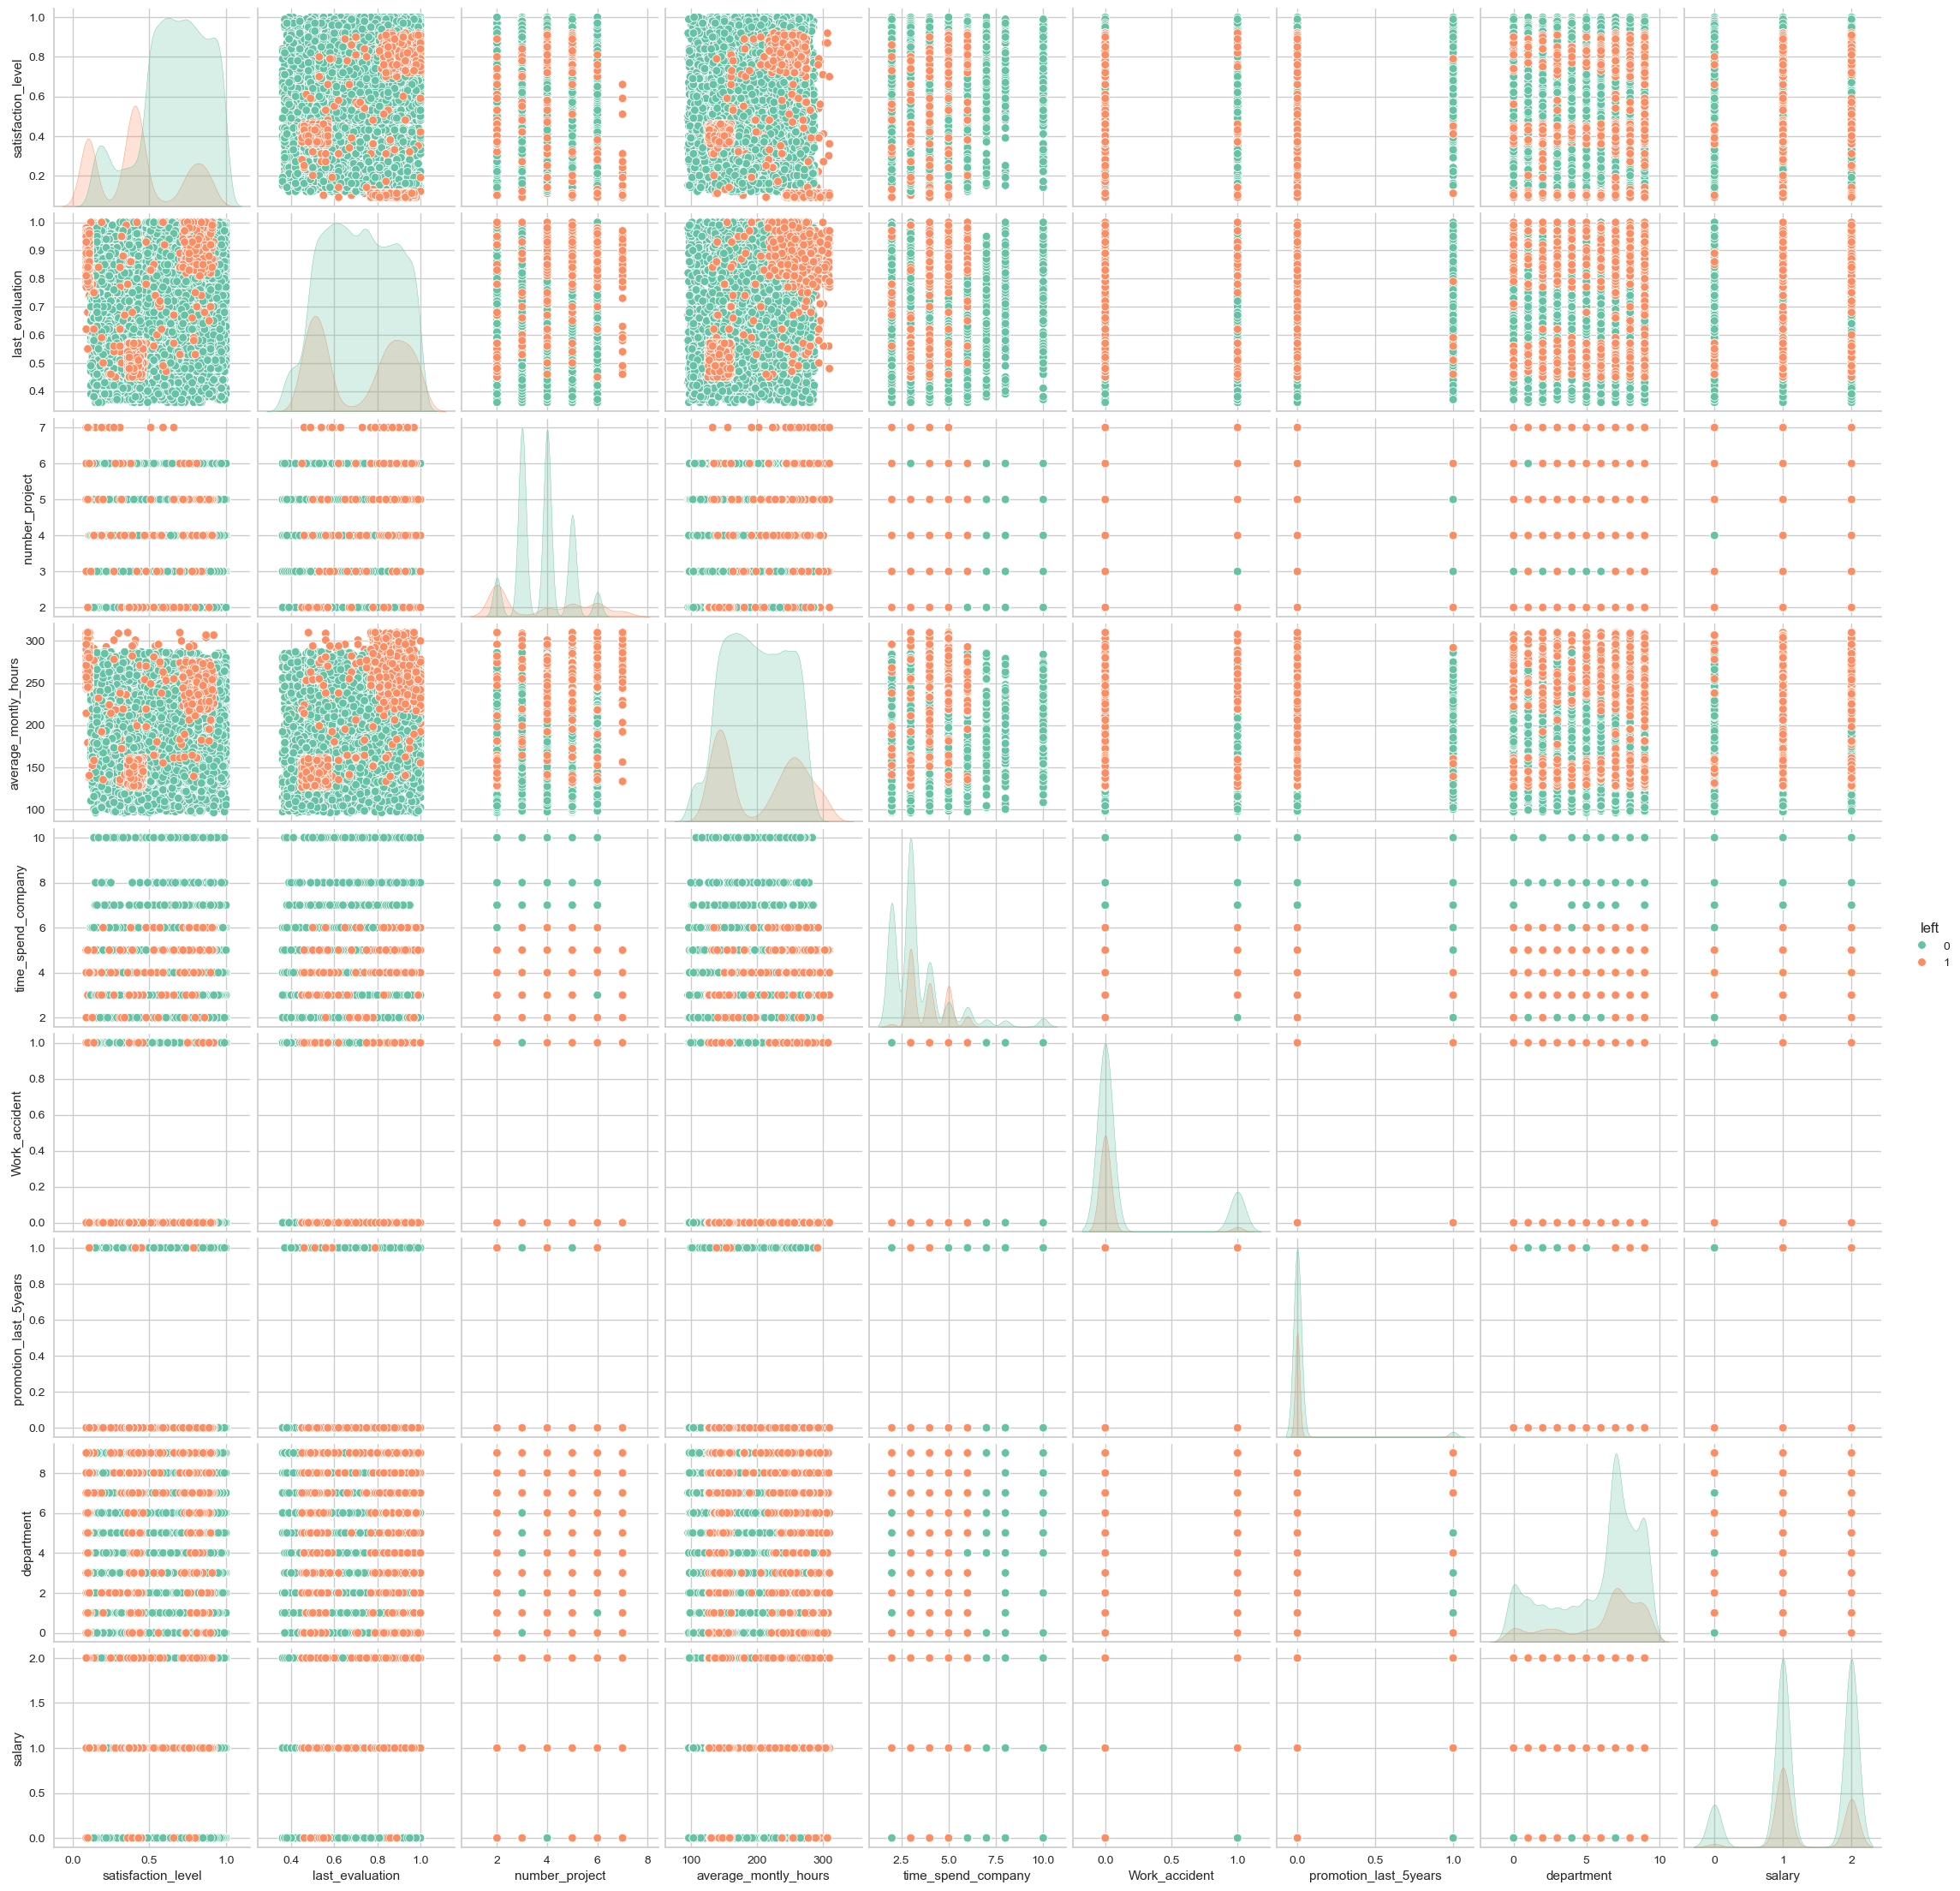

In [47]:
# Draw Pair Plot for the Data points in the Dataset
sns.pairplot(data=df, hue='left', palette='Set2')

In [11]:
# Grab the Train data
X = df2
y = df.left

# Grab the Columns name
colnames = X.columns
print(colnames)

Index(['time_spend_company', 'average_montly_hours', 'promotion_last_5years',
       'salary'],
      dtype='object')


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [13]:
# Scale the Feature values to standard (standardization)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.34196637, -0.66275493,  6.95547272, -0.55725074],
       [ 2.40774345,  0.59653191,  6.95547272, -2.16033192],
       [-0.34196637,  1.19619231, -0.14377168, -0.55725074],
       ...,
       [ 1.03288854,  0.81640739, -0.14377168, -0.55725074],
       [ 0.34546108, -0.26298133, -0.14377168,  1.04583044],
       [-0.34196637, -0.92260777, -0.14377168,  1.04583044]])

In [14]:
# LOGISTIC REGRESSION ALGORITHM

In [15]:
lr = LogisticRegression(C=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1000)

In [16]:
# Check the Model accuracy
print('Logistic Regression Accuracy Score:', lr.score(X_test, y_test))

Logistic Regression Accuracy Score: 0.747


In [17]:
# Check the Classification Report
y_pred_lr = lr.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, y_pred_lr))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_lr))
print('f1_score:', f1_score(y_test, y_pred_lr))

accuracy_score: 0.747
roc_auc_score: 0.49144736842105263
f1_score: 0.0


In [18]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      2280
           1       0.00      0.00      0.00       720

    accuracy                           0.75      3000
   macro avg       0.38      0.49      0.43      3000
weighted avg       0.58      0.75      0.65      3000



In [19]:
# Check confusion in determining the Target value in the created Model
confusion_matrix(y_test, y_pred_lr)  # confusion_matrix CANNOT be used with binary and continuous Feature values

array([[2241,   39],
       [ 720,    0]], dtype=int64)

In [20]:
# Create SVM Model Object
# Kernel possible values: linear, rbf, poly, sigmoid.
svm = SVC(kernel='rbf', C=100)
#svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=100)

In [21]:
# Test the created Model using the Test data
y_pred_svm = svm.predict(X_test)
if isinstance(svm, SVC):
    print('accuracy_score:', accuracy_score(y_test, y_pred_svm)) # accuracy_score CANNOT be used with binary and continuous Feature values in SVR
    print('roc_auc_score:', roc_auc_score(y_test, y_pred_svm)) # roc_auc_score CAN be used with binary and continuous Feature values in SVR
    print('f1_score:', f1_score(y_test, y_pred_svm))  # f1_score CANNOT be used with binary and continuous Feature values in SVR
elif isinstance(svm, SVR):
    print('roc_auc_score:', roc_auc_score(y_test, y_pred_svm)) # roc_auc_score CAN be used with binary and continuous Feature values in SVR



accuracy_score: 0.8746666666666667
roc_auc_score: 0.8467470760233918
f1_score: 0.7523056653491436


In [22]:
print(classification_report(y_test, y_pred_svm))  # classification_report CANNOT be used with binary and continuous Feature values

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2280
           1       0.72      0.79      0.75       720

    accuracy                           0.87      3000
   macro avg       0.82      0.85      0.83      3000
weighted avg       0.88      0.87      0.88      3000



In [23]:
# Check confusion in determining the Target value in the created Model
confusion_matrix(y_test, y_pred_svm)  # confusion_matrix CANNOT be used with binary and continuous Feature values

array([[2053,  227],
       [ 149,  571]], dtype=int64)

In [24]:
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
y_pred_dt = classifier.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, y_pred_dt))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_dt))
print('f1_score:', f1_score(y_test, y_pred_dt))

accuracy_score: 0.876
roc_auc_score: 0.8357456140350877
f1_score: 0.7459016393442623


In [26]:
print(classification_report(y_test, y_pred_dt))  # classification_report CANNOT be used with binary and continuous Feature values

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2280
           1       0.73      0.76      0.75       720

    accuracy                           0.88      3000
   macro avg       0.83      0.84      0.83      3000
weighted avg       0.88      0.88      0.88      3000



In [27]:
# Check confusion in determining the Target value in the created Model
confusion_matrix(y_test, y_pred_dt)  # confusion_matrix CANNOT be used with binary and continuous Feature values

array([[2082,  198],
       [ 174,  546]], dtype=int64)

In [28]:
# Train the Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [29]:
# Check accuracy of the Model
print(accuracy_score(y_test, y_pred_rf))

# Check confusion in determining the Target value in the created Model
confusion_matrix(y_test, y_pred_rf)

0.876


array([[2077,  203],
       [ 169,  551]], dtype=int64)

In [30]:
# Check the importance value of each Feature
#pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
pd.Series(rf.feature_importances_ , index=colnames).sort_values(ascending=False)

average_montly_hours     0.558962
time_spend_company       0.399610
salary                   0.035547
promotion_last_5years    0.005881
dtype: float64

In [31]:
X_train

array([[-0.34196637, -0.66275493,  6.95547272, -0.55725074],
       [ 2.40774345,  0.59653191,  6.95547272, -2.16033192],
       [-0.34196637,  1.19619231, -0.14377168, -0.55725074],
       ...,
       [ 1.03288854,  0.81640739, -0.14377168, -0.55725074],
       [ 0.34546108, -0.26298133, -0.14377168,  1.04583044],
       [-0.34196637, -0.92260777, -0.14377168,  1.04583044]])

In [32]:
gb = GradientBoostingClassifier(n_estimators=500)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print(accuracy_score(y_test, y_pred_gb))

0.882


In [33]:
ab = AdaBoostClassifier(n_estimators=45, algorithm='SAMME', learning_rate=1, random_state=0)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

In [34]:
# Check the Accuracy
print(accuracy_score(y_test, y_pred_ab))
print(roc_auc_score(y_test, y_pred_ab))
print(f1_score(y_test, y_pred_ab))

0.802
0.6302631578947369
0.42105263157894735


In [44]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_lr)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, y_pred_ab)

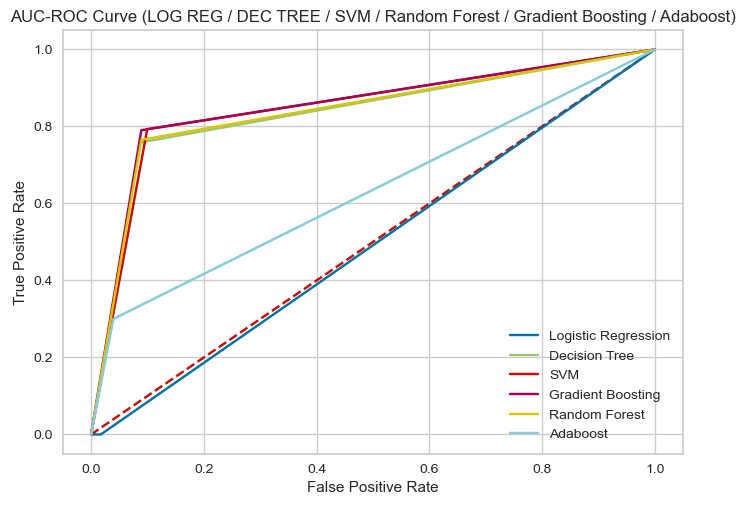

In [45]:
# Plot the False Positive Rate and True Positive Rate (ROC curve)
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1], 'r--')
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_ab, tpr_ab, label='Adaboost')
plt.title("AUC-ROC Curve (LOG REG / DEC TREE / SVM / Random Forest / Gradient Boosting / Adaboost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')
plt.show()

In [37]:
print("-*"*30)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
